<a href="https://colab.research.google.com/github/dimarsoft/kate_python/blob/main/mnist_for_Kate_08_11_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в нейронные сети
## Задание 1

### Импортируем все необходимые библиотеки

In [ ]:
import torch

import numpy as np
import matplotlib.pyplot as plt


from torchvision import datasets, transforms

from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset

### Скачиваем датасет mnist

In [ ]:
transform = transforms.ToTensor()

mnist = datasets.MNIST(root='mnist', download=True, transform=transform)


100%|██████████| 9912422/9912422 [00:00<00:00, 71442926.96it/s]


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 121378450.73it/s]


Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 24914589.45it/s]


Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19321023.09it/s]


Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



In [ ]:
# уже есть готовый X mnist.data
X = mnist.data
Y = mnist.targets

X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [ ]:
X_train = X_train.to(dtype=torch.float)
y_train = y_train.to(dtype=torch.int64)
X_test = X_test.to(dtype=torch.float)
y_test = y_test.to(dtype=torch.int64 )

In [ ]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

### Создаём model

In [ ]:
from torch import nn


model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=784, out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=64),
    nn.ReLU(),
    nn.Linear(in_features=64, out_features=10),
    # nn.Sigmoid(),
    #nn.Flatten(start_dim=0, end_dim=-1)
)

#nn.MSELoss

### Выводим summary модели

In [ ]:
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
from prettytable import PrettyTable
def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        params = parameter.numel()
        table.add_row([name, params])
        total_params+=params
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params

In [ ]:
count_parameters(model)

+----------+------------+
| Modules  | Parameters |
+----------+------------+
| 1.weight |   100352   |
|  1.bias  |    128     |
| 3.weight |    8192    |
|  3.bias  |     64     |
| 5.weight |    640     |
|  5.bias  |     10     |
+----------+------------+
Total Trainable Params: 109386


109386

### Обучаем модель

In [ ]:
from IPython.display import clear_output

def show_losses(train_loss_hist, test_loss_hist):
    clear_output()

    plt.figure(figsize=(12,4))

    plt.subplot(1, 2, 1)
    plt.title('Train Loss')
    plt.plot(np.arange(len(train_loss_hist)), train_loss_hist)
    plt.yscale('log')
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.title('Test Loss')
    plt.plot(np.arange(len(test_loss_hist)), test_loss_hist)
    plt.yscale('log')
    plt.grid()

    plt.show()

In [ ]:
def run(model, dataloader, loss_function, optimizer=None):
    # set the model to evaluation or training mode
    if optimizer == None:
        model.eval()
    else:
        model.train()

    total_loss = 0

    for X, y in dataloader:
        # compute prediction
        pred = model(X)
        # compute loss
        loss = loss_function(pred, y)
        # save loss
        total_loss += loss.item()
        if optimizer != None:
            # compute gradients
            loss.backward()
            # do optimizer step
            optimizer.step()
            # clear gradients
            optimizer.zero_grad()

    return total_loss / len(dataloader)

In [ ]:
from torchvision import datasets, transforms

transform = transforms.ToTensor()

mnist_train = datasets.MNIST(root='mnist', download=True, train=True, transform=transform)
mnist_test = datasets.MNIST(root='mnist', download=True, train=False,  transform=transform)


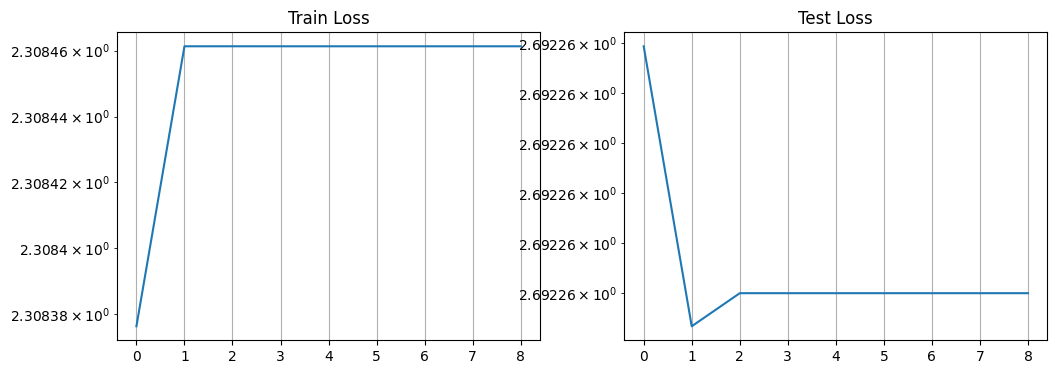

In [ ]:
from torch.utils.data import DataLoader

# your code here
loss_function = nn.CrossEntropyLoss()
from torch import optim

# your code here
optimizer = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9)
#loss_fn = nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=3e-3, momentum=0.9)

BATCH_SIZE = 32
NUM_EPOCHS = 10

# your code here
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

#train_loader = DataLoader(mnist_train, batch_size=BATCH_SIZE)
#test_loader = DataLoader(mnist_test, batch_size=BATCH_SIZE)


train_loss_hist = []
test_loss_hist = []

for i in range(NUM_EPOCHS):
    train_loss = run(model, train_loader, loss_function, optimizer)
    train_loss_hist.append(train_loss)
    test_loss = run(model, test_loader, loss_function)
    test_loss_hist.append(test_loss)

    if i % 2 == 0:
        show_losses(train_loss_hist, test_loss_hist)

In [ ]:
train_loader

### Добавляем колбек построения графиков обучения

### Выводы (сошлась ли модель по итогам обучения):

### Сравниваем несколько архитектур:

1)

2)

3)

## Выводы:

т